# Day2 Neural Networks


## Modeling procedure (Testing vs. Prediction)

- Modeling for statistical testing (e.g. t-test)
  1) Hypothesis 
  2) Model architecture (e.g. linear regression, classification, ..., $y=b_0 + b_1x$)
  3) Data collection
  4) Data preprocessing (e.g. normalization etc.)
  5) Model fitting (finding $b_0$ and $b_1$)
  6) Find the best model by repeating 2 and 5  (not including 3 and 4)
  7) Hypothesis evaluation

- Modeling for prediction (deep learning model)
  1) Objectives
  2) Model architecture (regression, classification, cnn, lstm, transformer, embeding models)
  3) Data collection
  4) Data preprocessing (e.g. encoding and embeding etc.)
  5) Model fitting (forward, backward)
  6) Find the best model by repeating 2, 4, 5
  7) Deploy (Use for prediction)
  8) Monitoring 

## Multiple regression

- Multiple Regression is a type of supervised learning where the model assumes a **linear relationship** between the input features $X$ and the target $y$:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon
$$

  Where:

  - $X = [x_1, x_2, \ldots, x_p]$ are the input features (gene $x_i$ expresion value, $y$ is target gene expression value)
  - $\beta_0, \beta_1, \ldots, \beta_p$ are the model coefficients (parameters).
  - $\epsilon$ is the error term.


## Neural networks

- A neural network with no hidden layers and a single output node is essentially a multiple regression  model
$$
  y = \sigma(W \cdot X + b)
$$

Where:

- $W$: Weight vector (equivalent to \(\beta\) in regression).
- $b$: Bias term (equivalent to \(\beta_0\) in regression).
- $\sigma$: activation function 
- Multiple regression can be seen as a very simple neural network

![](images/regression.png)

### Key Differences between linear regression and neural networks
- Linear vs. non-linear: Neural Networks with hidden layers and non-linear activation functions (e.g., ReLU, sigmoid), they can model highly complex, non-linear relationships.

- Interactions: Multiple Regression requires manual engineering of interaction terms (e.g., $x_1 \times x_2$. But Neural Networks automatically learn interactions between features through layers of non-linear transformations.

- Scale: linear regression is available with low-dimensional features while NN handle high-dimensional inputs, such as images or text.

### Neural Networks Extension
By introducing hidden layers and non-linear activation functions, neural networks extend regression to capture non-linear relationships:
$$
y = \sigma(W_2 \cdot \sigma(W_1 \cdot X + b_1) + b_2)
$$
where:
- $W_1$ and $W_2$: Weight matrices for hidden and output layers.
- $b_1$ and $b_2$: Bias terms.
- $\sigma$: Non-linear activation function (e.g., ReLU, sigmoid).

- Deeper networks with multiple layers allow for hierarchical feature learning, capturing increasingly abstract patterns in data.


![](images/nn2.png)


### Architecture of neural networks
- Neurons (Nodes): Basic units of a neural network that take inputs, perform a computation, and pass outputs 
- Layers:
   - Input Layer: The starting point where data is fed into the network
   - Hidden Layers: Intermediate layers between the input and output 
   - Output Layer: The final layer that produces the result (classification, regression)



### Weights and Biases:
- Weights: Parameters that determine the strength. Adjusted during training 
- Biases: Additional parameters added to the input. It allows more flexibility 


![](images/nn4.png)


### Activation Functions
   - Activation functions introduce non-linearity to the model, enabling it to learn complex patterns.
   - Common activation functions include:
     - **ReLU (Rectified Linear Unit)**: $ f(x) = \max(0, x) $
     - **Sigmoid**: $ f(x) = \frac{1}{1 + e^{-x}} $
     - **Tanh**: $ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

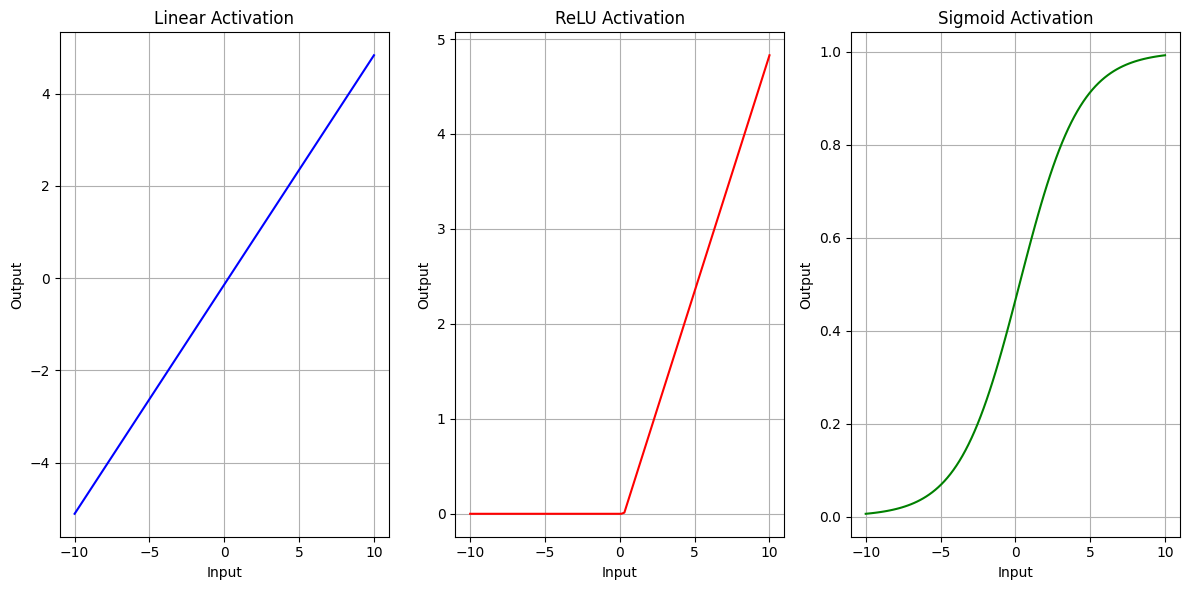

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # Input: 100 points from -10 to 10
weights = np.random.randn(1, 1)  # Random weights
bias = np.random.randn(1)  # Random bias

# Linear transformation
linear_output = X @ weights + bias

# Activation functions
def identity(x):
    return x  # Linear (no activation)

def relu(x):
    return np.maximum(0, x)  # ReLU

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid

# Apply activation functions
output_identity = identity(linear_output)
output_relu = relu(linear_output)
output_sigmoid = sigmoid(linear_output)

# Plot results
plt.figure(figsize=(12, 6))

# Plot the input-output relationship for each activation function
plt.subplot(1, 3, 1)
plt.plot(X, output_identity, label="Linear Activation (Identity)", color="blue")
plt.title("Linear Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(X, output_relu, label="ReLU Activation", color="red")
plt.title("ReLU Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(X, output_sigmoid, label="Sigmoid Activation", color="green")
plt.title("Sigmoid Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.tight_layout()
plt.show()


### Forward Pass
- The process of passing input data through the network, layer by layer, to produce an output.
- Each neuron computes a weighted sum of its inputs, adds a bias, and passes the result through an activation function.
- This involves applying a linear transformation. 



#### (Example) of Forward Pass and Loss Function

Let's consider a simple neural network with:
- **1 Input Layer**: 2 input nodes.
- **1 Hidden Layer**: 3 nodes with ReLU (Rectified Linear Unit) activation.
- **1 Output Layer**: 1 node with sigmoid activation.


![](images/nn_ex.png)

The forward pass computes:
1. **Input to Hidden Layer**:
$$
   Z^{(1)} = X W^{(1)} + b^{(1)} \\
$$

\begin{equation}
\begin{pmatrix}
z^{(1)}_1 \\
z^{(1)}_2 \\
z^{(1)}_3 
\end{pmatrix} 

=

\begin{pmatrix}
x_1 \ x_2
\end{pmatrix}

\begin{pmatrix}
w^{(1)}_{11} \ w^{(1)}_{12} \ w^{(1)}_{1n} \\
w^{(1)}_{21} \ w^{(1)}_{21} \  w^{(1)}_{2n}
\end{pmatrix}


+

\begin{pmatrix}
b^{(1)}_1 \\
b^{(1)}_2 \\
b^{(1)}_3 
\end{pmatrix}

\end{equation}

$$
   A^{(1)} = \text{ReLU}(Z^{(1)})
$$


\begin{equation}
\begin{pmatrix}
a^{(1)}_1 \\
a^{(1)}_2 \\
a^{(1)}_3 
\end{pmatrix}

= 

\begin{pmatrix}
\text{Relu}(z^{(1)}_1) \\
\text{Relu}(z^{(1)}_2) \\
\text{Relu}(z^{(1)}_3) 
\end{pmatrix}

\end{equation}



2. **Hidden to Output Layer**:
$$
Z^{(2)} = A^{(1)} W^{(2)} + b^{(2)} \\
$$

\begin{equation}
\begin{pmatrix}
z^{(2)}_1
\end{pmatrix} 

=

\begin{pmatrix}
a^{(1)}_1 \ a^{(1)}_2 \ a^{(1)}_3 
\end{pmatrix}

\begin{pmatrix}
w^{(2)}_{11} \\
w^{(2)}_{21} \\
w^{(2)}_{31}
\end{pmatrix}

+

\begin{pmatrix}
b^{(2)}_1 
\end{pmatrix}
\end{equation}

$$
A^{(2)} = \text{Sigmoid}(Z^{(2)})
$$


\begin{equation}
\begin{pmatrix}
a^{(2)}_1
\end{pmatrix}
 = 
\begin{pmatrix}
 \text{Sigmoid} (z^{(2)}_1 )
\end{pmatrix}
\end{equation}

$$
\hat{y} = a^{(2)}_1
$$

In [1]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(42)
# Input data (2 features for each samplen)
X = np.array([[0.5, 0.2], [0.1, 0.4], [0.6, 0.9]])  # Shape (3 samples, 2 features)
y = np.array([[1], [0], [1]]) 

print("X:\n", X)
print("y:\n", y)

# Weights and biases for the hidden layer
W1 = np.random.randn(2, 3)  # Shape (2 input nodes, 3 hidden nodes)
b1 = np.random.randn(1, 3)  # Shape (1 bias per hidden node)

# Weights and biases for the output layer
W2 = np.random.randn(3, 1)  # Shape (3 hidden nodes, 1 output node)
b2 = np.random.randn(1, 1)  # Shape (1 bias for the output node)

print("W1:\n", W1)
print("b1:\n", b1)

print("W2:\n", W2)
print("b2:\n", b2)

# Forward Pass
# Step 1: Input to Hidden Layer
Z1 = X @ W1 + b1  # Linear transformation
A1 = relu(Z1)     # Activation

# Step 2: Hidden to Output Layer
Z2 = A1 @ W2 + b2  # Linear transformation
A2 = sigmoid(Z2)   # Activation (Final output)
y_hat = A2

# Print results
print("Hidden Layer Output (after ReLU):\n", A1)
print("Final Output (after Sigmoid):\n", A2)


X:
 [[0.5 0.2]
 [0.1 0.4]
 [0.6 0.9]]
y:
 [[1]
 [0]
 [1]]
W1:
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]
b1:
 [[ 1.57921282  0.76743473 -0.46947439]]
W2:
 [[ 0.54256004]
 [-0.46341769]
 [-0.46572975]]
b2:
 [[0.24196227]]
Hidden Layer Output (after ReLU):
 [[2.13217586 0.6514719  0.        ]
 [2.23809617 0.65994695 0.        ]
 [3.24796818 0.47373811 0.        ]]
Final Output (after Sigmoid):
 [[0.74967732]
 [0.75958995]
 [0.85626904]]



### Loss Function
- A measure of how well the neural network's predictions match the actual data. Common loss functions include Mean Squared Error (MSE) for regression and Cross-Entropy Loss for classification.
   
$$
L = \frac{1}{n} || y - \hat{y} ||^2 =  \frac{1}{n}\sum(y_i-\hat{y}_i)^2
$$

In [33]:
np.mean((y - y_hat)**2)

0.22009897381259744


### Backpropagation and Training
- Backpropagation: The process of adjusting weights and biases based on the loss. It uses gradients computed by the chain rule to update these parameters through gradient descent or other optimization algorithms.
- Optimization Algorithm: Techniques like Stochastic Gradient Descent (SGD) or Adam adjust the model parameters to minimize the loss.

#### Chain Rule

Derivative of a composite function
$$
z = f(g(x))
$$

$$
\frac{dz}{dx} = f'(g(x)) \cdot g'(x)
$$





$$
y = g(x) \\
z = f(y)
$$

$$
\frac{dz}{dx} = \frac{dy}{dx} \frac{dz}{dy} = f'(y)g'(x)
$$



![](images/bp.png)

- Set $w_{11}^{(2)}$ randomaly
- Forward pass for loss calculation $J(\theta)$
- Compute gradient of loss with respect to $w_{11}^{(2)}$

$$
\frac{\partial L}{\partial w_{11}^{(2)}} =  \frac{\partial z^{(2)}}{\partial w_{11}^{(2)}} \frac{\partial y}{\partial z^{(2)}} \frac{\partial L}{\partial y}
$$

- Update $w_{11}^{(2)}$ and iteratively compute forward pass and backprop until convergence

In [6]:
import numpy as np

# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error Loss and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -(y_true - y_pred)

# Input data and true labels
X = np.array([[0.5, 0.2], [0.1, 0.4], [0.6, 0.9]])  # Shape (3 samples, 2 features)
y = np.array([[1], [0], [1]])                      # True labels (Shape: 3x1)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(2, 3)  # Weights for input to hidden layer
b1 = np.random.randn(1, 3)  # Bias for hidden layer
W2 = np.random.randn(3, 1)  # Weights for hidden to output layer
b2 = np.random.randn(1, 1)  # Bias for output layer

# Training parameters
learning_rate = 0.1
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Forward Pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    # Compute Loss
    loss = mse_loss(y, A2)

    # Backpropagation
    # Output layer
    dA2 = mse_loss_derivative(y, A2)
    dZ2 = dA2 * sigmoid_derivative(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Hidden layer
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
print("\nFinal Predictions:")
Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = sigmoid(Z2)
print(A2)


Epoch 0, Loss: 0.2201
Epoch 100, Loss: 0.1853
Epoch 200, Loss: 0.1417
Epoch 300, Loss: 0.0806
Epoch 400, Loss: 0.0383
Epoch 500, Loss: 0.0198
Epoch 600, Loss: 0.0118
Epoch 700, Loss: 0.0079
Epoch 800, Loss: 0.0058
Epoch 900, Loss: 0.0044

Final Predictions:
[[0.93258656]
 [0.0744951 ]
 [0.97627875]]



## PyTorch

PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It is widely used in research and industry due to its dynamic computation graph and ease of use.

PyTorch Ecosystem Overview:

torch: The core library for tensor operations and automatic differentiation.  
torch.nn: A sub-library used to build and train neural network models.  
torch.optim: Tools for optimization algorithms (e.g., SGD, Adam).  
torchvision: Provides datasets, pre-trained models, and image transformations.  


**Tensors**

Tensors are the primary data structures in PyTorch, analogous to NumPy arrays but with added capabilities such as the ability to run on GPUs for faster computation.


Epoch 0, Loss: 0.2275
Epoch 100, Loss: 0.2192
Epoch 200, Loss: 0.2141
Epoch 300, Loss: 0.2061
Epoch 400, Loss: 0.1925
Epoch 500, Loss: 0.1692
Epoch 600, Loss: 0.1317
Epoch 700, Loss: 0.0874
Epoch 800, Loss: 0.0543
Epoch 900, Loss: 0.0376

Final Predictions:
tensor([[0.8810],
        [0.2476],
        [0.9134]])


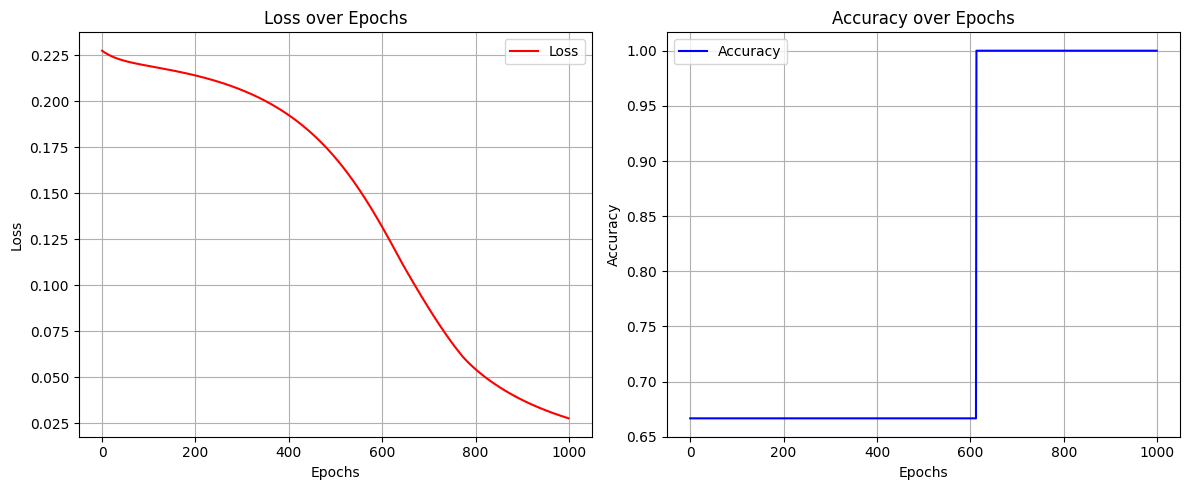

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



# Input data and true labels
X = torch.tensor([[0.5, 0.2], [0.1, 0.4], [0.6, 0.9]], dtype=torch.float32)  # Shape (3 samples, 2 features)
y = torch.tensor([[1], [0], [1]], dtype=torch.float32)                      # True labels (Shape: 3x1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.hidden = nn.Linear(2, 3)  # Input to hidden layer (2 inputs, 3 hidden nodes)
        self.output = nn.Linear(3, 1)  # Hidden to output layer (3 hidden nodes, 1 output)

    def forward(self, x):
        # Forward pass: Input -> Hidden Layer -> Output Layer
        x = torch.relu(self.hidden(x))       # ReLU activation for hidden layer
        x = torch.sigmoid(self.output(x))    # Sigmoid activation for output layer
        return x

# Initialize the network
model = SimpleNN()

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

# Training parameters
epochs = 1000

# Containers to store loss and accuracy for each epoch
loss_history = []
accuracy_history = []


# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)  # Predicted outputs
    loss = criterion(outputs, y)  # Compute loss

    # Compute accuracy
    predicted = (outputs >= 0.5).float()  # Threshold at 0.5 for binary classification
    accuracy = (predicted == y).sum().item() / y.size(0)


    # Backpropagation
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Record loss and accuracy
    loss_history.append(loss.item())
    accuracy_history.append(accuracy)


    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Final predictions
with torch.no_grad():  # No need to compute gradients during inference
    final_outputs = model(X)
    print("\nFinal Predictions:")
    print(final_outputs)


# Plot the loss and accuracy over epochs
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label="Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_history, label="Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()